# Convolutional Neural Network
## Week-7 - 2023

**CIFAR dataset:**

The CIFAR dataset is a popular benchmark dataset in the field of computer vision and machine learning. It is a collection of labeled images used to train and test machine learning models, particularly for image classification tasks. The dataset is widely used because it represents a real-world problem and introduces several challenges that students should be aware of.

**Classification Problem:**

The classification problem of the CIFAR dataset is to correctly categorize images into predefined classes. For CIFAR-10, there are ten distinct classes, and for CIFAR-100, there are one hundred classes. Each image belongs to one of these classes, and the goal is to design a model that can accurately assign the correct class label to each image.





In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from sklearn.model_selection import train_test_split

In [2]:
# Load the CIFAR-10 dataset

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print('X_train size: ',X_train.shape)
print('y_train size: ',y_train.shape)
print('X_test size:  ',X_test.shape)
print('y_test size:  ',y_test.shape)

X_train size:  (50000, 32, 32, 3)
y_train size:  (50000, 1)
X_test size:   (10000, 32, 32, 3)
y_test size:   (10000, 1)


In [4]:
# Class names in the CIFAR-10 dataset 

classes=['aircraft', 'car', 'bird', 'cat', 'deer',
 'dog', 'frog', 'hours', 'ship', 'truck']

classes

['aircraft',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'hours',
 'ship',
 'truck']

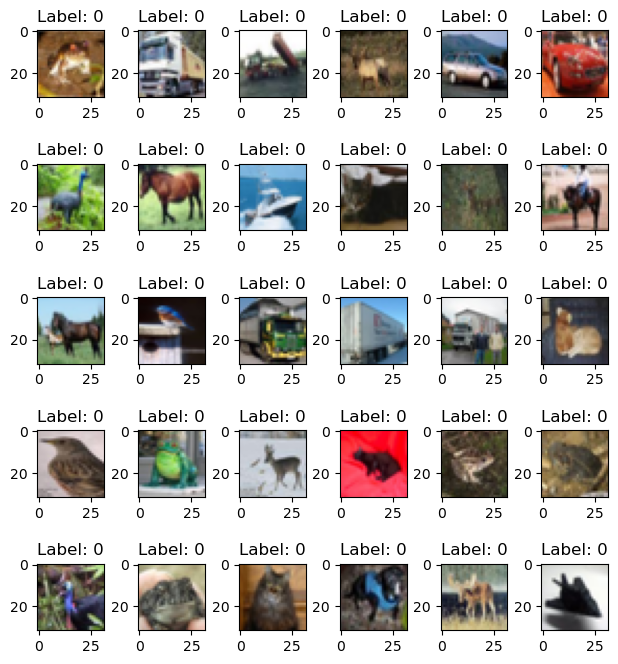

In [5]:
# Display a few images before model development, Hint - plt.title(f"Label: {y_train[i].argmax()}") will give you True Label.
#
#
# Your code to display a few images before the model development.
#
#
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=1, wspace=0.05)

for i in range(30):
    plt.subplot(5, 6, i + 1)
    plt.imshow(X_train[i], cmap=plt.cm.gray )
    plt.title(f"Label: {y_train[i].argmax()}")

plt.show()

In [6]:
# Preprocess the data

X_train = X_train.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test, 10)

### MLP model

In [7]:
# Create an MLP model using Keras

mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=X_train.shape[1:]))
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))

# print the MLP model

print(mlp_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1707274 (6.51 MB)
Trainable params: 1707274 (6.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [8]:
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train and evaluate the MLP classifier

history = mlp_model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 56s 34ms/step - loss: 1.8557 - accuracy: 0.3285
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.6685 - accuracy: 0.4014
Epoch 3/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.5860 - accuracy: 0.4351
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5422 - accuracy: 0.4483
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5016 - accuracy: 0.4627
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4806 - accuracy: 0.4704
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4576 - accuracy: 0.4802
Epoch 8/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.4366 - accuracy: 0.4868
Epoch 9/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4197 - accuracy: 0.4939
Epoch 10/10
1563/1563 [==============================] - 45s 29m

C:\Users\adity\AppData\Local\Temp\ipykernel_8604\256823875.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


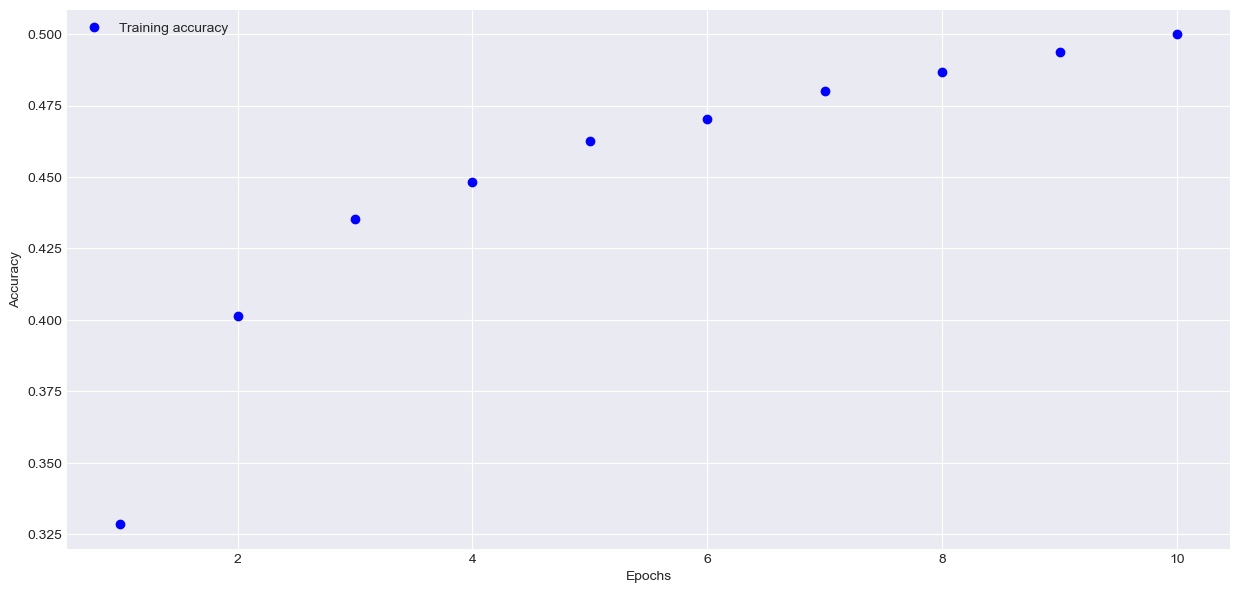

In [10]:
 # Print the training process graph and result 

history_dict = history.history
plt.style.use('seaborn-darkgrid') 

acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [11]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [12]:
# evaluation - Accuracy result on the Test set

mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}%")

MLP Test Accuracy: 48.33%


### CNN model

In [13]:
# Create a CNN model using Keras

cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

# print the CNN model

print(cnn_model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [14]:
# compilation

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train and evaluate the CNN classifier

history2 = cnn_model.fit(X_train, y_train, epochs=10, verbose = 1)

Epoch 1/10
1563/1563 [==============================] - 32s 18ms/step - loss: 1.5431 - accuracy: 0.4368
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1722 - accuracy: 0.5836
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0033 - accuracy: 0.6466
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9068 - accuracy: 0.6827
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8396 - accuracy: 0.7043
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7786 - accuracy: 0.7273
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7387 - accuracy: 0.7408
Epoch 8/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6929 - accuracy: 0.7559
Epoch 9/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6564 - accuracy: 0.7700
Epoch 10/10
1563/1563 [==============================] - 29s 19m

C:\Users\adity\AppData\Local\Temp\ipykernel_8604\362339719.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


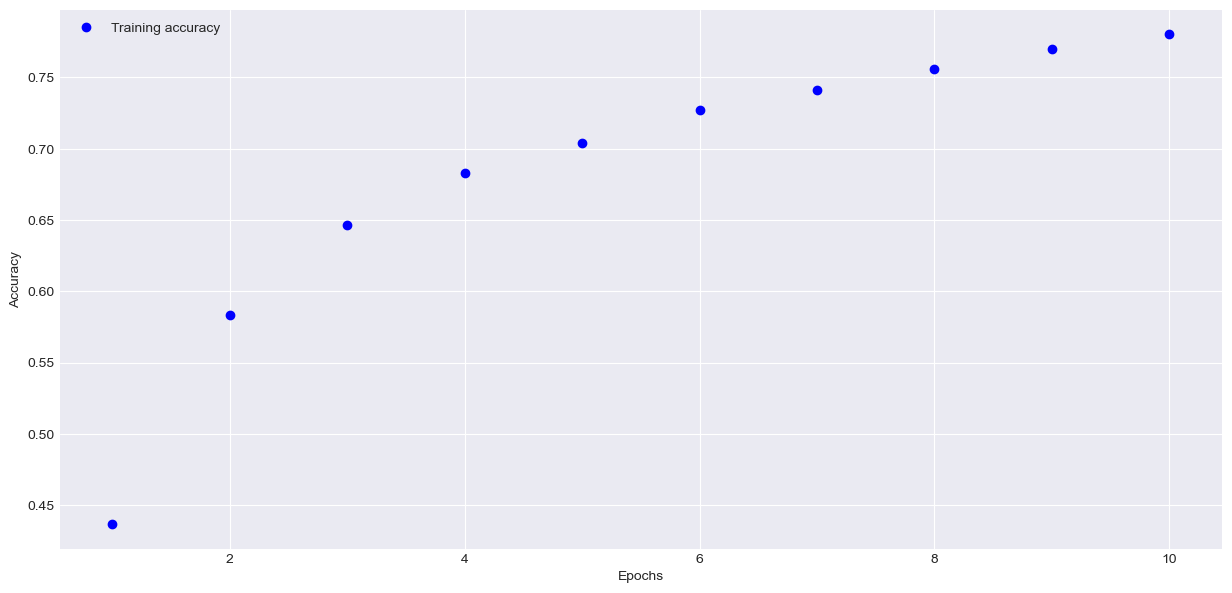

In [16]:
# Your code to print the CNN training process graph and result 
#
#
#
history_dict = history2.history
plt.style.use('seaborn-darkgrid') 

acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
# evaluation - Accuracy result on the Test set

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

CNN Test Accuracy: 71.41%


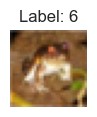

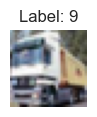

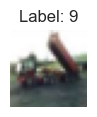

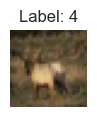

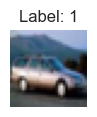

In [18]:
# Display a few images after CNN model development

for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
    plt.show()



Based on the aforementioned code, perform the following activity:


1.   Using the provided code, create one distinct CNN models with architectures different from the one provided.


2.  Train the model with three different optimizers selected from the options available at https://keras.io/api/optimizers/.

3.  Measure the time it takes to train each model with its respective optimizer by importing the 'time' module and recording the start and end times using 'time.time()'.

4. Include this bar plot in your lab logbook to compare training times with different optimizers.

5. Strive to fine-tune the model parameters to achieve higher accuracy, ideally surpassing 90%. Document in your lab logbook the highest accuracy you have achieved through this fine-tuning process.

In [19]:
# Your code to do the above activity.
# Hint - import time
#
#
import time

In [20]:
# Your code to do the above activity.
# Hint - Put name of optimizers 
#
#
optimizers =['RMSprop','Nadam','Adadelta']


In [21]:
# Your code to do the above activity.
# Hint - Store training time and accuracy in lists
#
#
accuracies =[]
training_times =[]

In [23]:
# Your code to do the above activity.
# Hint - use loops for use different optimizers

for optimizer in optimizers:
    # Create a new CNN models with architectures different from the one provided
    #
    #
    print(optimizer,"\n")
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='tanh', input_shape=X_train.shape[1:]))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='tanh'))
    model.add(MaxPooling2D((3, 3)))

    model.add(Conv2D(64, (4, 4), activation='tanh'))

    model.add(Flatten())

    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile the model with the current optimizer
    #
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    # Measure training time
    #
    #
    start=time.time()
    model.fit(X_train, y_train, epochs=20, verbose = 1)
    end = time.time()
    training_time=end-start
    training_times.append(training_time)
    # Evaluate the model
    #
    #
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)
    print(accuracy)

RMSprop 

Epoch 1/20
1563/1563 [==============================] - 30s 17ms/step - loss: 1.3815 - accuracy: 0.5051
Epoch 2/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0522 - accuracy: 0.6295
Epoch 3/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9277 - accuracy: 0.6743
Epoch 4/20
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8478 - accuracy: 0.7027
Epoch 5/20
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7831 - accuracy: 0.7260
Epoch 6/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7278 - accuracy: 0.7451
Epoch 7/20
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6778 - accuracy: 0.7625
Epoch 8/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6313 - accuracy: 0.7797
Epoch 9/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5905 - accuracy: 0.7936
Epoch 10/20
1563/1563 [==============================]

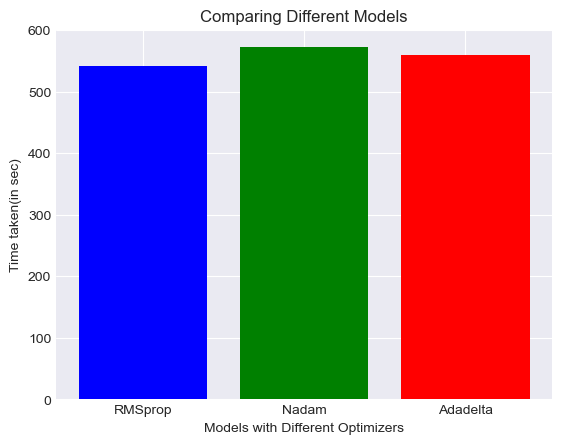

In [24]:
# Your code to do the above activity.
# Generate a bar plot to compare training times
#
#
plt.xlabel('Models with Different Optimizers')
plt.ylabel('Time taken(in sec)')
plt.title('Comparing Different Models')
plt.bar(x=optimizers, height=training_times, color=['blue', 'green', 'red']);

Lab Logbook Requirements:

1. Record the bar graph depicting the comparison of training times.
2. Record the final accuracy achieved.


In [25]:
# Print accuracies achieved with different optimizers

for i, optimizer in enumerate(optimizers):
    print(f"{optimizer} Optimizer - Test Accuracy: {accuracies[i] * 100:.2f}%")

RMSprop Optimizer - Test Accuracy: 67.33%
Nadam Optimizer - Test Accuracy: 67.31%
Adadelta Optimizer - Test Accuracy: 32.61%


In [26]:
# Your code to
# Find and print the highest achieved accuracy
#
print("Highest accuracy is" , max(accuracies)*100,"%")

Highest accuracy is 67.330002784729 %
